# SHK distance Comparison between the proximal solver between ours and Jing et al. (2022)

In this notebook, we compare our proximal algorithm and the algorithm by Jing et al. (2022) for the constant mass $\rho_t(\Omega)=1$.

**Reference.**
Jing, Y., Chen, J., Li, L., & Lu, J. (2022). A deep learning framework for geodesics under spherical Wasserstein-Fisher-Rao metric and its application for weighted sample generation. arXiv. https://arxiv.org/abs/2208.12145

In [6]:
import matlab.engine
import io

eng = matlab.engine.start_matlab()

# Create a StringIO buffer to capture output
output_buffer = io.StringIO()

# Redirect MATLAB output to the buffer
eng.eval("disp('joe mama')", nargout=0, stdout=output_buffer)

# Print the captured output
print(output_buffer.getvalue())

# Close the buffer
output_buffer.close()


joe mama



In [20]:
import matlab.engine
import io

output_buffer = io.StringIO()

print('Starting MATLAB engine...')
eng = matlab.engine.start_matlab()

print('Running SWFR_main.m...')
eng.cd(r'C:\Users\mao17\Workspace\pdot\proximal\code_from_jing_et_al_2022', nargout=0)
eng.SWFR_main(nargout=0, stdout=output_buffer)
#eng.run('SWFR_main.m', nargout=0)
#eng.quit()

print('Output:')

print(output_buffer.getvalue())
output_buffer.close()

eng.quit()

Starting MATLAB engine...
Running SWFR_main.m...
Output:
Starting...     1

the value of WFR is  0.000000 Gap 7.797e+01      2

the value of WFR is  0.000004 Gap 6.334e+01      3

the value of WFR is  0.000009 Gap 5.417e+01      4

the value of WFR is  0.000013 Gap 4.792e+01      5

the value of WFR is  0.000018 Gap 4.338e+01      6

the value of WFR is  0.000027 Gap 3.990e+01      7

the value of WFR is  0.000040 Gap 3.713e+01      8

the value of WFR is  0.000056 Gap 3.486e+01      9

the value of WFR is  0.000078 Gap 3.297e+01     10

the value of WFR is  0.000104 Gap 3.134e+01     11

the value of WFR is  0.000135 Gap 2.994e+01     12

the value of WFR is  0.000172 Gap 2.870e+01     13

the value of WFR is  0.000214 Gap 2.761e+01     14

the value of WFR is  0.000262 Gap 2.663e+01     15

the value of WFR is  0.000316 Gap 2.575e+01     16

the value of WFR is  0.000375 Gap 2.494e+01     17

the value of WFR is  0.000441 Gap 2.421e+01     18

the value of WFR is  0.000513 Gap 2.354e

Shape of rho_final: (61, 100)
Sample data:
 [[7.73360132e-05 1.31467508e-04 2.19150725e-04 ... 2.62935017e-04
  1.54672026e-04 8.92201505e-05]
 [8.81376470e-05 1.54781186e-04 2.07575475e-04 ... 2.66012989e-04
  1.76314734e-04 1.05912918e-04]
 [9.89773003e-05 1.77931412e-04 1.95895260e-04 ... 2.68331537e-04
  1.98057628e-04 1.22552883e-04]
 ...
 [3.13513682e-05 4.78190903e-05 2.66463715e-05 ... 9.36340659e-05
  1.66206664e-05 3.88336190e-05]
 [1.57442191e-05 2.39842863e-05 1.54846037e-05 ... 8.03556819e-05
  8.66596923e-06 1.94397158e-05]
 [2.41017049e-11 6.23574145e-11 1.58203564e-10 ... 6.23574145e-11
  2.41017049e-11 9.13472041e-12]]
Nx: 100
Nt: 61


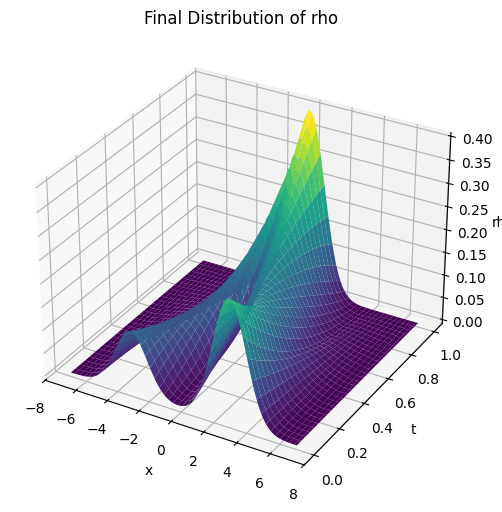

In [22]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Step 1: Load the .mat file
mat_data = scipy.io.loadmat(r'C:\Users\mao17\Workspace\pdot\proximal\code_from_jing_et_al_2022\rho_final.mat')  # Path to your rho_final.mat file

# Step 2: Extract the rho_final array
# MATLAB variables are stored as keys in the loaded dictionary
rho_final = mat_data['rho_final']  # rho_final is now a NumPy array

# Step 3: Print shape and inspect
print("Shape of rho_final:", rho_final.shape)
print("Sample data:\n", rho_final)

# Step 4: Create a meshgrid for x and t dimensions
Nx = rho_final.shape[1]  # Spatial points
Nt = rho_final.shape[0]  # Time steps
print("Nx:", Nx)
print("Nt:", Nt)

x = np.linspace(-7, 7, Nx)  # Replace bounds with your MATLAB X values
t = np.linspace(0, 1, Nt)  # Replace bounds with your MATLAB T values
X, T = np.meshgrid(x, t)

# Step 5: Plot rho_final as a 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, T, rho_final, cmap='viridis')

# Customize plot
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('rho')
ax.set_title('Final Distribution of rho')

# Show plot
plt.show()